<a href="https://colab.research.google.com/github/mountechsolutions/face-mask-detection/blob/master/computer_vision.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf

In [2]:
mnist = tf.keras.datasets.fashion_mnist

In [5]:
(training_images, training_labels),(test_images, test_labels) = mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


9
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0   0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62  54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134 144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178 107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216 216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   0   0   0   1   1   1   0 200 232 232 233 229 223 

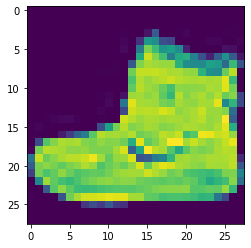

In [6]:
import numpy as np
import matplotlib.pyplot as plt
np.set_printoptions(linewidth=200)
plt.imshow(training_images[0])
print(training_labels[0])
print(training_images[0])

5
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   1   0   0   0 110  60  38  94  73  27 

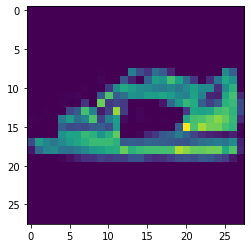

In [7]:
np.set_printoptions(linewidth=200)
plt.imshow(training_images[13])
print(training_labels[13])
print(training_images[13])


In [8]:
#Normalization
training_images = training_images / 255.0
test_images = test_images / 255.0

Define and compile the model

In [14]:
model = tf.keras.models.Sequential([tf.keras.layers.Flatten(),
                                   tf.keras.layers.Dense(128, tf.nn.relu),
                                   tf.keras.layers.Dense(10, tf.nn.softmax)])

Sequential: SEQUENCE of layers in the neural network

Flatten: Takes the square (shape of images) and turns it into a 1 dimensional set.

Dense: Adds a layer of neurons

activation function: Each layer of neurons need an activation function to tell them what to do.

Relu: It only passes values 0 or greater to the next layer in the network.

Softmax: takes a set of values, and effectively picks the biggest one. The goal is to save a lot of coding!

Now the model is defined!
You do this by compiling it with an optimizer and loss function as before and then you train it by calling model.fit.

In [15]:
from tensorflow.keras import optimizers
optimizers.Adam()

In [19]:
model.compile(optimizer = optimizers.Adam(),
              loss = 'sparse_categorical_crossentropy',
              metrics = ['accuracy'])

Train the neural network

In [20]:
model.fit(training_images, training_labels, epochs = 5)

Epoch 1/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6328 - accuracy: 0.7821
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3886 - accuracy: 0.8609
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3434 - accuracy: 0.8738
Epoch 4/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3134 - accuracy: 0.8846
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3021 - accuracy: 0.8883


In [21]:
model.evaluate(test_images, test_labels)

313/313 [==============================] - 0s 1ms/step - loss: 0.3499 - accuracy: 0.8758


[0.34989094734191895, 0.8758000135421753]

5


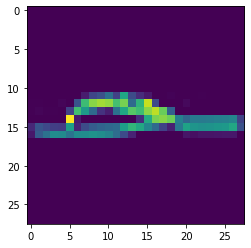

In [22]:
np.set_printoptions(linewidth=200)
plt.imshow(test_images[8])
print(test_labels[8])

In [23]:
model.fit(training_images, training_labels, epochs = 10)

Epoch 1/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2849 - accuracy: 0.8935
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2696 - accuracy: 0.8986
Epoch 3/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2595 - accuracy: 0.9029
Epoch 4/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2504 - accuracy: 0.9071
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2396 - accuracy: 0.9102
Epoch 6/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2341 - accuracy: 0.9119
Epoch 7/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2256 - accuracy: 0.9164
Epoch 8/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2201 - accuracy: 0.9167
Epoch 9/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2129 - accuracy: 0.9206
Epoch 10/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.204

In [24]:
model.evaluate(test_images, test_labels)

313/313 [==============================] - 0s 1ms/step - loss: 0.3569 - accuracy: 0.8833


[0.3569422960281372, 0.8833000063896179]

????Task 5: Solve Simple exercises.
Exercise 1
The output, after you run the code below is a list of numbers. Why do you think this is, and what do those numbers represent???

It's 10 random meaningless values
It's the first 10 classifications that the computer made
It's the probability that this item is each of the 10 classes

In [25]:
classifications = model.predict(test_images)

print(classifications[0])

[3.8541511e-08 4.2087484e-12 5.5806356e-11 3.9674923e-13 7.0462476e-11 5.9920101e-05 2.3368271e-08 1.6385909e-03 3.0783185e-11 9.9830139e-01]



Exercise 2
How do you know that this list tells you that the item is an ankle boot? ??

There's not enough information to answer that question
The 10th element on the list is the biggest, and the ankle boot is labelled 9
The ankle boot is label 9, and there are 0->9 elements in the list

9
[[0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.         0.         0.  

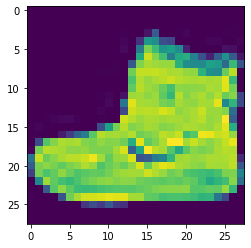

In [26]:
import numpy as np
np.set_printoptions(linewidth=200)
import matplotlib.pyplot as plt
plt.imshow(training_images[0])
print(training_labels[0])
print(training_images[0])


Exercise 3
Let's now look at the layers in your model. Experiment with different values for the dense layer with 512 neurons. Increase to 1024 Neurons -- What's the impact? ??

Training takes the same time, but is more accurate
Training takes longer, but is more accurate
Training takes longer, but no impact on accuracy

In [27]:
import tensorflow as tf
print(tf.__version__)

mnist = tf.keras.datasets.mnist

(training_images, training_labels) ,  (test_images, test_labels) = mnist.load_data()

training_images = training_images/255.0
test_images = test_images/255.0

model = tf.keras.models.Sequential([tf.keras.layers.Flatten(),
                                    tf.keras.layers.Dense(1024, activation=tf.nn.relu),
                                    tf.keras.layers.Dense(10, activation=tf.nn.softmax)])

model.compile(optimizer = 'adam',
              loss = 'sparse_categorical_crossentropy')

model.fit(training_images, training_labels, epochs=5)

model.evaluate(test_images, test_labels)

classifications = model.predict(test_images)

print(classifications[0])
print(test_labels[0])

2.4.0
11493376/11490434 [==============================] - 0s 0us/step
Epoch 1/5
1875/1875 [==============================] - 14s 8ms/step - loss: 0.3066
Epoch 2/5
1875/1875 [==============================] - 14s 7ms/step - loss: 0.0745
Epoch 3/5
1875/1875 [==============================] - 12s 7ms/step - loss: 0.0449
Epoch 4/5
1875/1875 [==============================] - 14s 7ms/step - loss: 0.0342
Epoch 5/5
313/313 [==============================] - 1s 3ms/step - loss: 0.0722
[8.9431917e-10 2.1794939e-09 1.3889570e-07 2.7888515e-07 4.9632776e-12 1.4282303e-08 7.9679813e-14 9.9999869e-01 1.0806607e-11 9.0498156e-07]
7


In [28]:
import tensorflow as tf
print(tf.__version__)

mnist = tf.keras.datasets.mnist

(training_images, training_labels) ,  (test_images, test_labels) = mnist.load_data()

training_images = training_images/255.0
test_images = test_images/255.0

model = tf.keras.models.Sequential([tf.keras.layers.Flatten(),
                                    tf.keras.layers.Dense(1024, activation=tf.nn.relu),
                                    tf.keras.layers.Dense(10, activation=tf.nn.softmax)])

model.compile(optimizer = 'adam',
              loss = 'sparse_categorical_crossentropy')

model.fit(training_images, training_labels, epochs=5)

model.evaluate(test_images, test_labels)

classifications = model.predict(test_images)

print(classifications[0])
print(test_labels[0])
# Apply Gradient descent Optimizer
optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)

# Initializing the variables
init = tf.initialize_all_variables()


# Launching the graph
with tf.Session() as sess:
    sess.run(init)

# Fitting our training data
    for epoch in range(num_epochs):
        for (x, y) in zip(train_X, train_Y):
            sess.run(optimizer, feed_dict={X: x, Y: y})

        #Display logs per epoch step
        if (epoch+1) % display_step == 0:
            c = sess.run(cost, feed_dict={X: train_X, Y:train_Y})
            print("Epoch:", '%04d' % (epoch+1), "cost=", "{:.9f}".format(c), 
                "W=", sess.run(W), "b=", sess.run(b))

    print('\n', "Our Model is Ready!", '\n')
    training_cost = sess.run(cost, feed_dict={X: train_X, Y: train_Y})
    print("Training cost =", training_cost, '\n', "W=", sess.run(W), '\n', "b=", sess.run(b), '\n')
    
    plt.plot(train_X, train_Y, 'ro', label='Original data')
    plt.plot(train_X, sess.run(W) * train_X + sess.run(b), label='Fitted line')
    plt.legend(loc='lower right')
    plt.show()

2.4.0
Epoch 1/5
1875/1875 [==============================] - 14s 7ms/step - loss: 0.3171
Epoch 2/5
1875/1875 [==============================] - 14s 7ms/step - loss: 0.0769
Epoch 3/5
1875/1875 [==============================] - 14s 7ms/step - loss: 0.0459
Epoch 4/5
1875/1875 [==============================] - 14s 7ms/step - loss: 0.0316
Epoch 5/5
313/313 [==============================] - 1s 3ms/step - loss: 0.0813
[2.5066360e-09 3.1629649e-10 1.0783318e-08 1.9074576e-05 6.4832952e-12 1.2703576e-08 1.0990138e-14 9.9997604e-01 1.3774022e-07 4.7862718e-06]
7


AttributeError: ignored